# Prediction of strokes by Machine Learning
Coded by Joaquin Miranda
version 3.0, 04.06.2022




# Abstract
By means of several machine learning methods, we model the possibility of predicting strokes in a dataset containing a very low presence of stroke cases. Specifically, it contains 5% of strokes. To surpass this large imbalance in the dataset, we employ the so-called Synthetic Minority Oversampling Technique to equal the number of stroke patients with patiance who did not suffer it. The machine learning methods we apply are a Decision tree classifier', logistic regression, random forest classifier, K-Neighbors classifiers, support vector machines,  Multinomial naive  Bayes, and a neural network.  We shortly discuss the implication of precision, recall, and accuracy scores in the context of predicting strokes and their values obtained for each of the models. As we will see, it is difficult to keep all score high and some compromise have to be done. In our case we opt for a high recall score which is suitable to predict strokes. We show that a neural network with two layers and a total of 150 perceptrons provides an appropiate architecture to achieve a recall score above 90%. The second best machine learning model was the Multinomial naive  Bayes scoring a recall store of 58%. All our modeling was based on Sklearn and TensorFlow and some special modules of Python.

In [1]:
## imported modules
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate  # pip3 install tabulate 
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import recall_score, roc_auc_score, precision_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

from imblearn.over_sampling import SMOTE # pip3 install imblearn

# Introduction 
A distinction is made between risk factors that can be influenced and that cannot be influenced.
Risk factors that cannot be influenced are: Inheritance, Age, Gender
Risk factors that can be influenced are: High blood pressure, and Arteriosclerosis – changes in the blood vessels due to deposits, BMI (body mass index), High blood sugar, Overweight, Smoking, Alcohol consumption, Stress.

We examined whether or not a stroke can be predicted on the basis of values collected for risk factors in patients. Our work is based on the “Stroke Prediction Dataset” from kaggle.com
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset. This dataset includes information such as gender, age, demographics, various medical conditions, and smoking status of patients who had or had not a stroke. The last column of the record provides information about this and can be used as a label column.

It is aimed that with machine learning algorithmic a better diagnostic precision the doctors can be achieved. The incidence of stroke cases in the data is lower than 5%. So, it is expected that the doctor's diagnosis will be at least 5%. 95% are either false negative (non-detected) or negative. The working hypothesis is that some vital parameters can influence the risk of a stroke. Among those mentioned are age, hypertension, and the BMI.

# Data description and pre-processing. 
The dataset has 5,110 rows and 12 columns and is 310 KB in size. 

First task is to delete unnecessary data. Delete the one line with gender = 'Other', deleting the Id column - not a feature. Second task is to Convert string to numeric values. ML algorithms require numeric values. Therefore all columns with string values are transformed. Transformations with a multi column encoder for the columns:
'work_type','gender','ever_married','Residence_type','smoking_status'.

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
# df.columns
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [5]:
df.groupby('gender').apply(len)

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [6]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True) # Delete "Other" from Gender columns
df.groupby('gender').apply(len)
# df.groupby('smoking_status').apply(len)
# Cheking categories
# feature_names = ['gender', 'hypertension', 'heart_disease', 'ever_married',
#        'work_type', 'Residence_type', 'smoking_status']

# for feature in feature_names:
#     print(df.groupby(feature).apply(len))


gender
Female    2994
Male      2115
dtype: int64

In [7]:
s1_u  = len(df.loc[(df['smoking_status']=='Unknown') & (df['stroke']==1)])
s0_u  = len(df.loc[(df['smoking_status']=='Unknown') & (df['stroke']==0)])
st_1 = len(df.loc[ df['stroke']==1])
st_0 = len(df.loc[ df['stroke']==0])
print(st_1, st_0, s1_u, s0_u , st_1/(st_1 + st_0), s1_u/(s1_u + s0_u))

249 4860 47 1497 0.04873752201996477 0.03044041450777202


## Explorative plotting

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Patients')

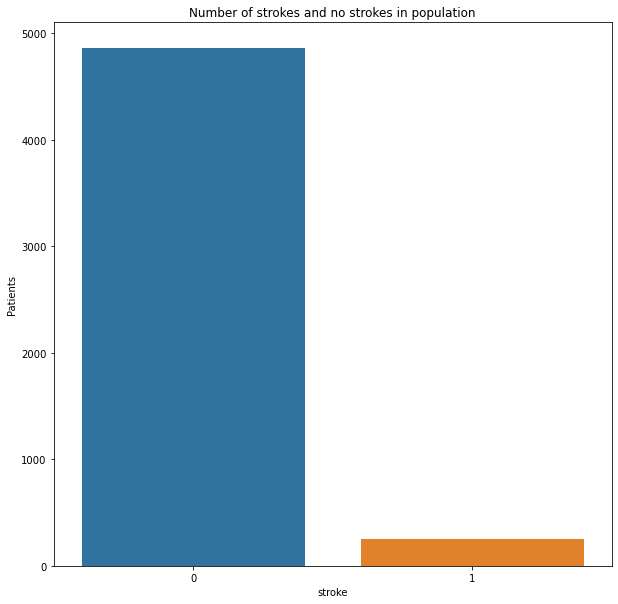

In [8]:
# Plot number patients suffering stroke
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(df['stroke'])
plt.title('Number of strokes and no strokes in population')
plt.xlabel('stroke')
plt.ylabel('Patients')

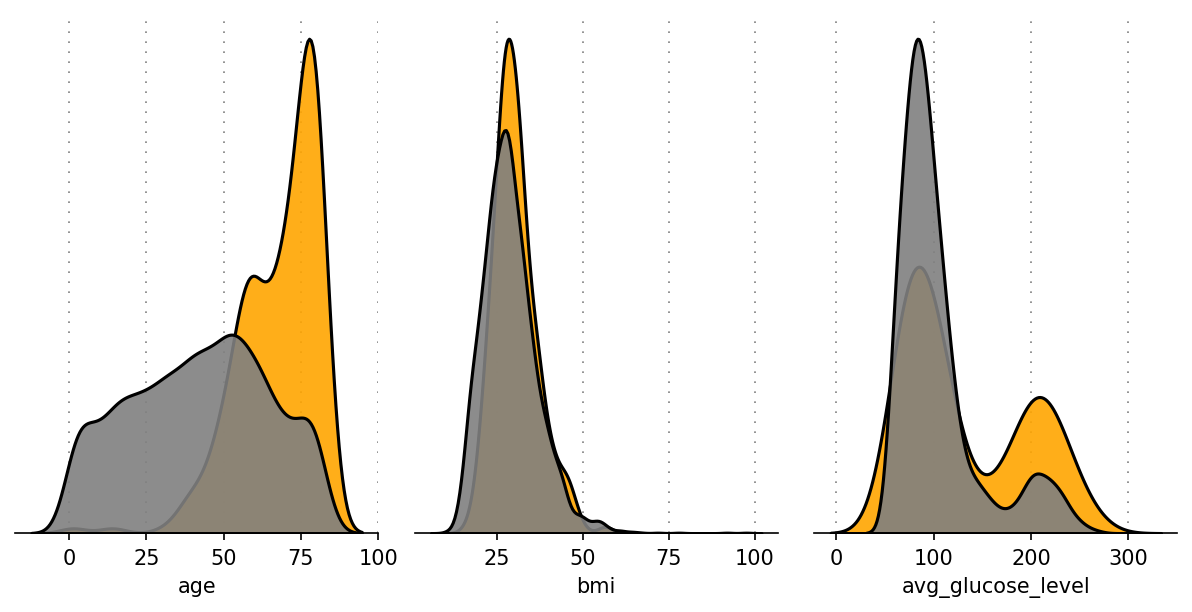

In [9]:
    # Plot the three continous variables
    features = ['age', 'bmi', 'avg_glucose_level',]

    fig = plt.figure(figsize=(10, 11), dpi=150)
    gs = fig.add_gridspec(2, 3)
    gs.update(wspace=0.1, hspace=0.4)
    background_color = 'white'
    
    plot = 0
    for row in range(0, 1):
        for col in range(0, 3):
            locals()["ax" + str(plot)] = fig.add_subplot(gs[row, col])
            locals()["ax" + str(plot)].set_facecolor(background_color)
#            locals()["ax" + str(plot)].tick_params(axis='y', left=False)
            locals()["ax" + str(plot)].get_yaxis().set_visible(False)
            for s in ["top", "right", "left"]:
                locals()["ax" + str(plot)].spines[s].set_visible(False)
            plot += 1

    plot = 0

    stroke = df[df['stroke'] == 1]
    nostroke = df[df['stroke'] == 0]

    for feature in  features:
        sns.kdeplot(stroke[feature], ax=locals()["ax" + str(plot)], color='orange', shade=True, linewidth=1.5,
                    ec='black', alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(nostroke[feature], ax=locals()["ax" + str(plot)], color='gray', shade=True, linewidth=1.5,
                    ec='black', alpha=0.9, zorder=3, legend=False)
        locals()["ax" + str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':',
                                        dashes=(1, 5))
        locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

In [10]:
# df_ytrain = pd.DataFrame(y_train, columns=['stroke'])
# sns.countplot(df_ytrain['stroke'])
# plt.xlabel('stroke')
# plt.ylabel('Patients')

##  Encoding and Data Curing

In [11]:
# Take independent variable (X) and labeled data (y). They still data frames
X_inp = df.drop('stroke', axis='columns')
# y_tar = df['stroke'] # Or copy last colums# y_tar = df.iloc[:, -1]
#y_tar.head(5)

Encode variables gender, ever_married, work_type, Residence_type, smoking_status.
Two options: with a class (MultiColumnLabelEncoder) or column by column (x_encoding)

In [12]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [13]:
X_inp = MultiColumnLabelEncoder(columns=['gender', 'ever_married', 'work_type', 'Residence_type',
                                            'smoking_status']).fit_transform(X_inp)
X_inp.head(6)
X_inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 608.0 KB


## Correlation

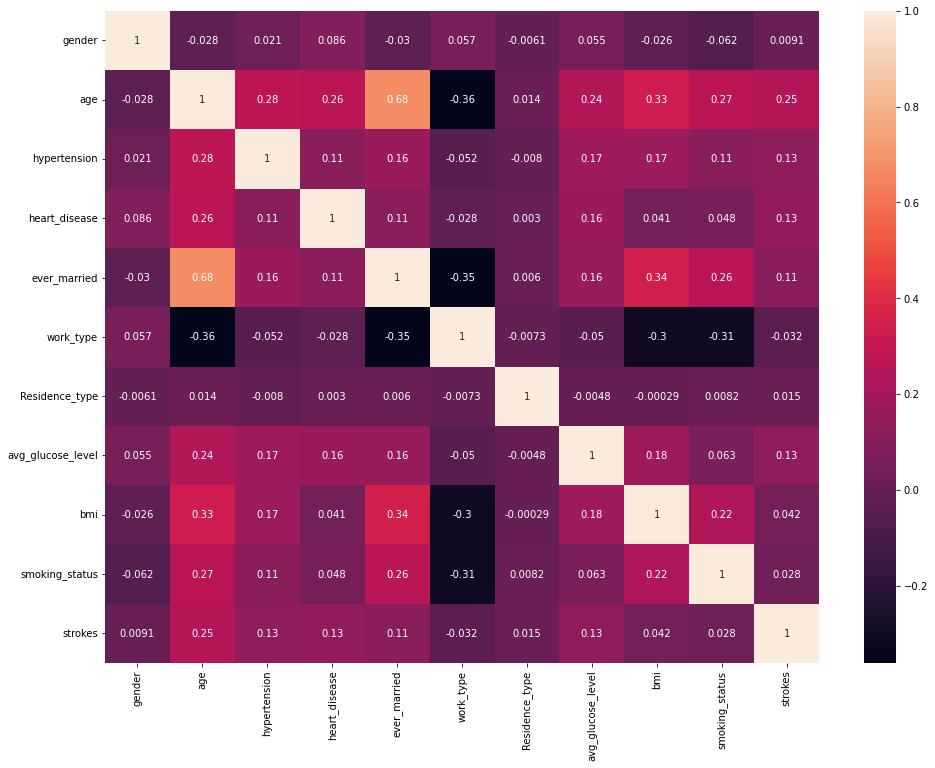

In [14]:
fig, ax = plt.subplots(figsize=(16,12))
XM = X_inp.copy()
XM['strokes'] = df['stroke']
corrMatrix = XM.drop(['id'], axis='columns').corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig('corrematrix0.png')
del [[XM]]

## Imputers
Three imputing methods: Simple, multivariative and decision tree
Impute decision tree Method based on age and gender. After imputing X  and y outputs have numpy array formats.

In [15]:
def simple_imputer(X_inp):
    print("Simple Imputer used")
    # X_bmi= df[['bmi']].copy()
    X_inp = X_inp.drop('id', axis='columns')
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(X_inp)
    #print(SimpleImputer(missing_values=-1))
    X_inp = imp.transform(X_inp)
    # print("After simple Imputer")
    # print(X_inp0[:12])

    # Adapt to numpy array format to use afterwards
    X = X_inp

    return X

def multi_imputer(X_inp):

    print("Multivariative Imputer used")
    X_inp = X_inp.drop('id', axis='columns')
    # print("Before Mul Var. Imputer")
    # print(X_inp0[:12])
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(X_inp)
    X_inp = imp.transform(X_inp)

    print("After Mul Var. Imputer")
    print(X_inp[:11])

    # Adapt to numpy array format to use afterwards
    X = X_inp
    return X

def decision_tree_imputer(X_inp):

    print("Decision Tree Imputer used")
    DT_bmi_pipe = Pipeline(steps=[
                               ('scale', MinMaxScaler()),
                               ('lr', DecisionTreeRegressor(random_state=42))
                              ])
    X_tofit = X_inp[['age', 'gender', 'bmi']].copy()
#    X_tofit.gender = X_tofit.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

    Missing = X_tofit[X_tofit.bmi.isna()]
    X_tofit = X_tofit[~X_tofit.bmi.isna()]
    Y_tofit = X_tofit.pop('bmi')
    DT_bmi_pipe.fit(X_tofit, Y_tofit)
    predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age', 'gender']]), index=Missing.index)
    X_inp.loc[Missing.index, 'bmi'] = predicted_bmi

    X_inp = X_inp.drop('id', axis='columns')
    print("After decision three imputer ")
 #   print(X_inp.columns)
    print(X_inp.loc[:11])

    # Adapt to numpy array format to use afterwards
    # Pandas internally uses np.arrays. We need the values attribute
    X = X_inp.values
    return X


def convert_to_csv(X,df):
    
    feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

    print(np.shape(X))
    DFx = pd.DataFrame(X, columns=feature_names)
    DFx['stroke'] =  df.stroke.values #df['stroke'].copys
    DFx.to_csv("X_mulvalimput.csv")
    DFx. columns

In [16]:
# X = simple_imputer(X_inp); y = df.stroke.values
#X = multi_imputer(X_inp); y = df.stroke.values
X = decision_tree_imputer(X_inp); y = df.stroke.values
#convert_to_csv(X,df)
#print(X[:,8]) # Check values of the 7th colum for all raws

Decision Tree Imputer used
After decision three imputer 
    gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1  67.0             0              1             1          2   
1        0  61.0             0              0             1          3   
2        1  80.0             0              1             1          2   
3        0  49.0             0              0             1          2   
4        0  79.0             1              0             1          3   
5        1  81.0             0              0             1          2   
6        1  74.0             1              1             1          2   
7        0  69.0             0              0             0          2   
8        0  59.0             0              0             1          2   
9        0  78.0             0              0             1          2   
10       0  81.0             1              0             1          2   
11       0  61.0             0              1          

In [17]:
# # df_modeled = pd.read_csv('Javier_X_mulvalimput_transformerquantil_normal.csv')
# df_modeled = pd.read_csv('X_mulvalimput.csv'); y = df.stroke.values
# # X = df_modeled.drop(['stroke', 'Unnamed: 0'], axis='columns')
# y = df_modeled['stroke']

## Split data in test and train 

In [18]:
trainperc = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=trainperc, random_state=42)
X_train0 = X_train

# Data Augmentation

As we have seen in the data exploratory, we have just below 5 % of stroke cases. This creates a problem for the modeling due to the large unbalance between strokes and no-stroke. That is, the distribution of data gives a bias towards no stroke cases since they dominate with over 95%. This means, our model will predict much better the non-stroke cases than the strokes cases.

To alleviate this problem, we use a Python class named SMOTE which creates extra copies to balance the ratio between cases with stroke and no stroke. This is known in the field as data augmentation. (Data augmentation --> Synthetic Minority Oversampling Technique: SMOTE). 
SMOTE works by selecting data examples that are close in the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example is found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. For an excellent discussion about the problem to use SMOTE, see https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be

Next, we apply this method to our data.

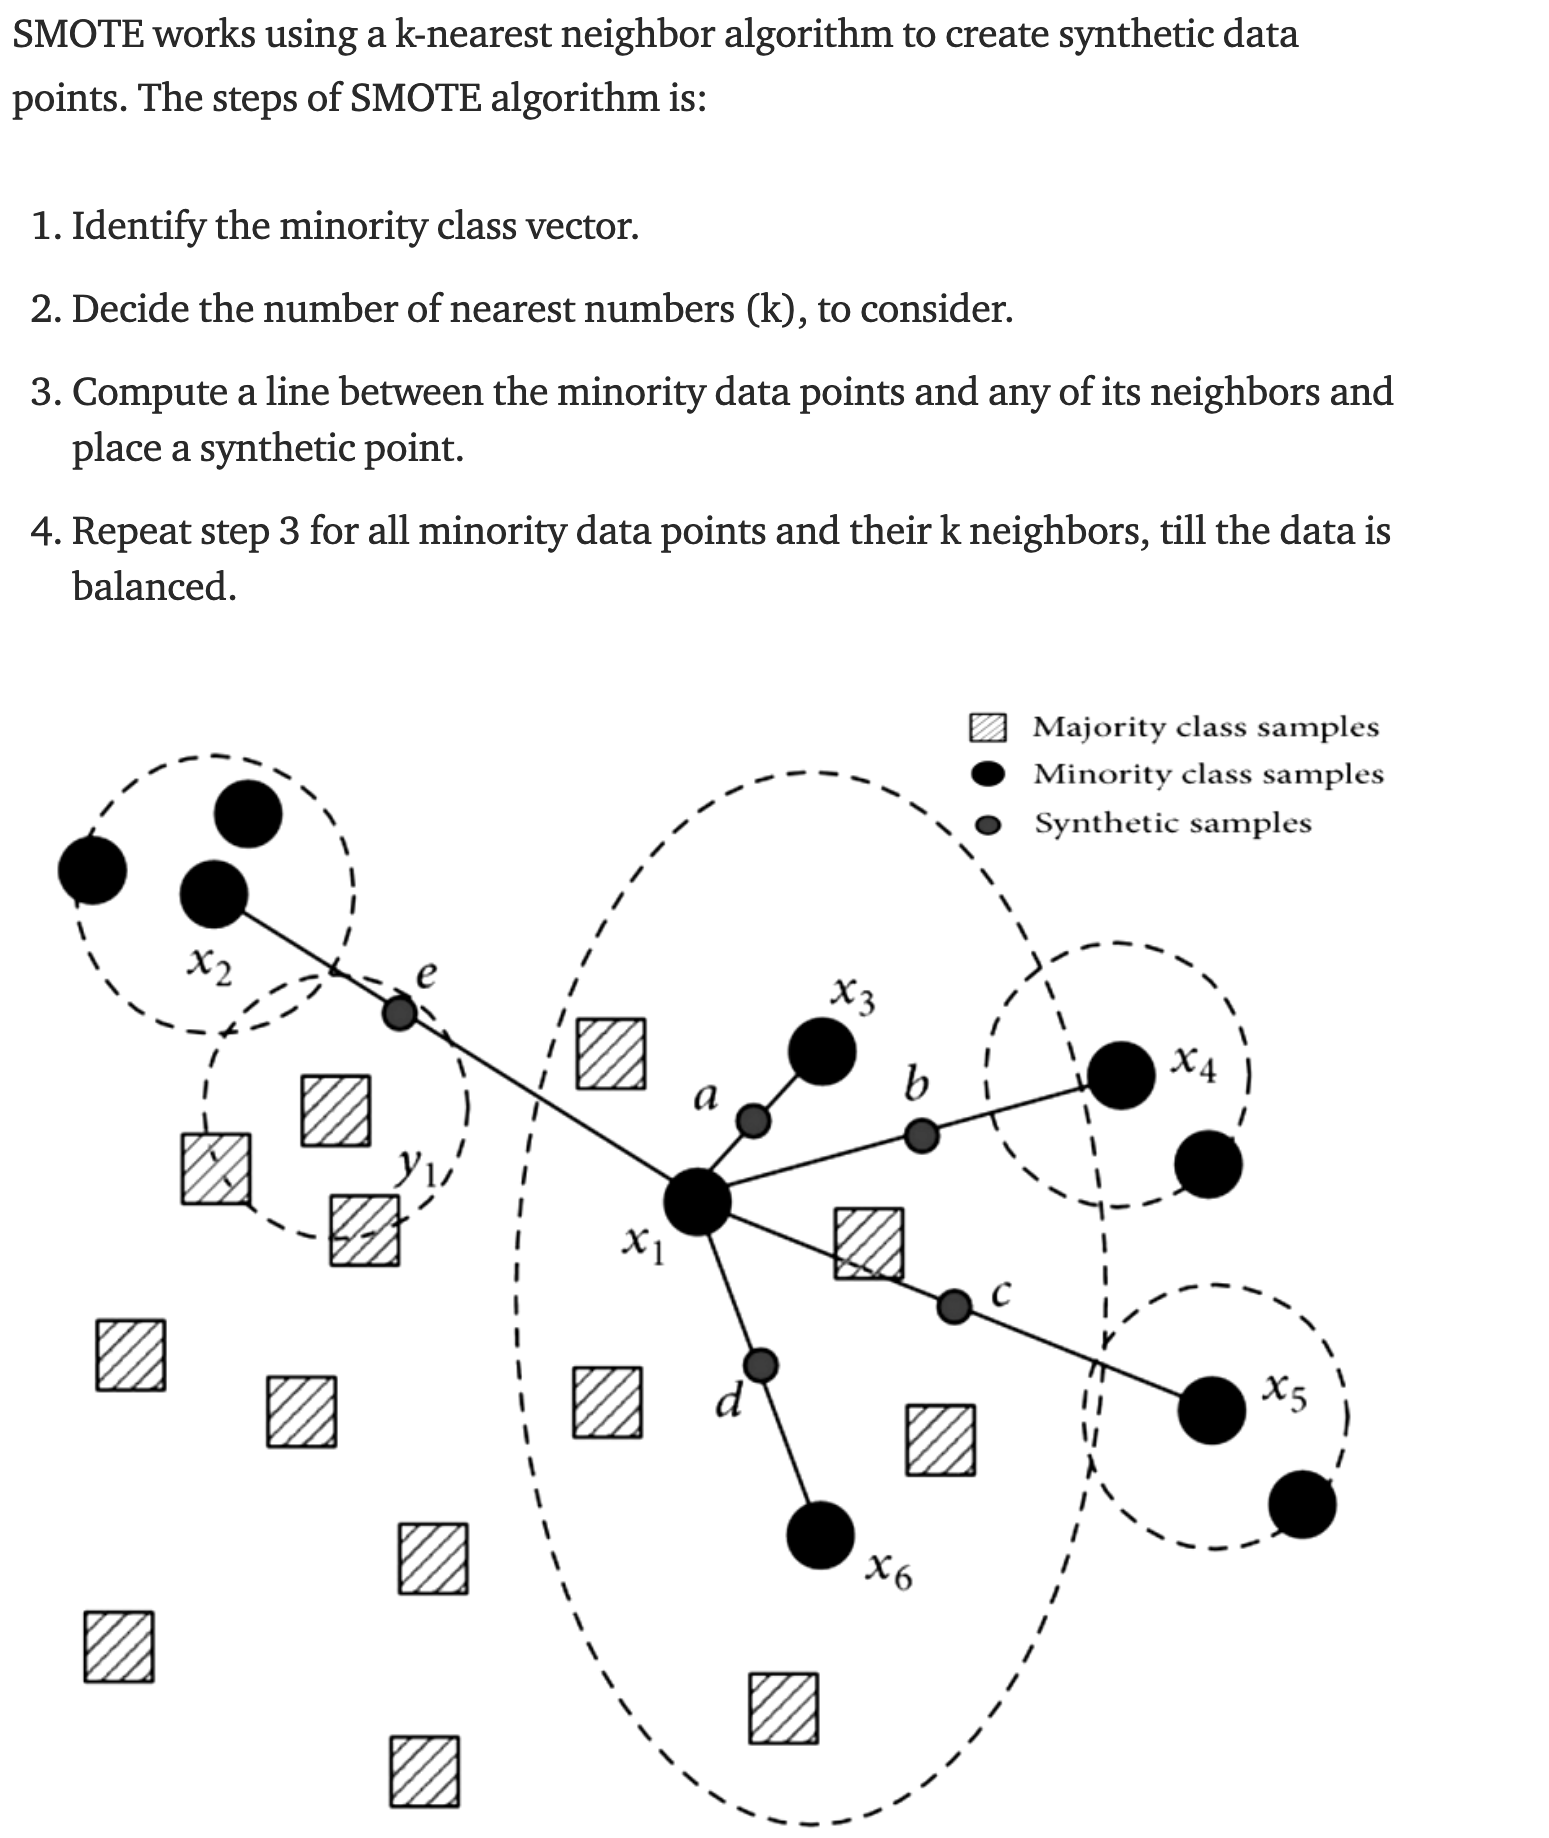

In [19]:
Image('smote.png')

In [20]:
sm_sample = SMOTE()
X_train, y_train = sm_sample.fit_resample(X_train, y_train)
#print(X_train[:,8]) # Check values of the 7th colum for all raws

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of cases')

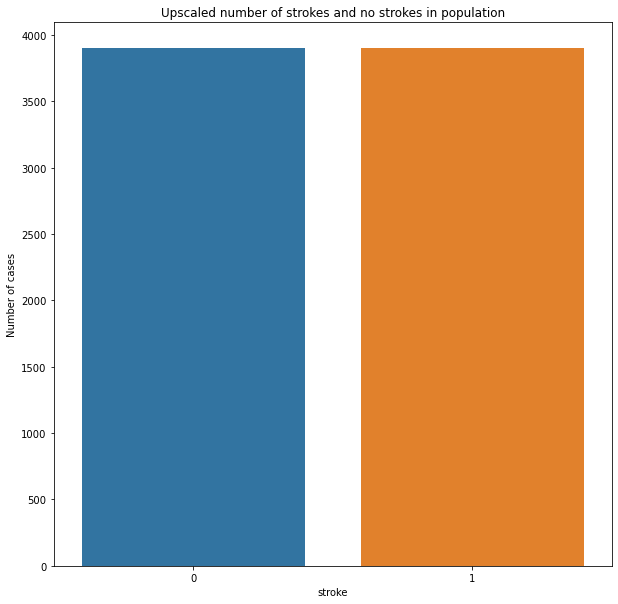

In [21]:
# Plot number of upscaling cases for patients suffering stroke
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y_train)
plt.title('Upscaled number of strokes and no strokes in population')
plt.xlabel('stroke')
plt.ylabel('Number of cases')

In the next two plots, we compare the distribution of data points when we use the three continuous variables as the axis. Apparently, the augmented data has been distributed around the pre-existing points and not homogeneously which helps to preserve the clusters.

Text(0.5, 0.92, 'Original data')

<Figure size 432x288 with 0 Axes>

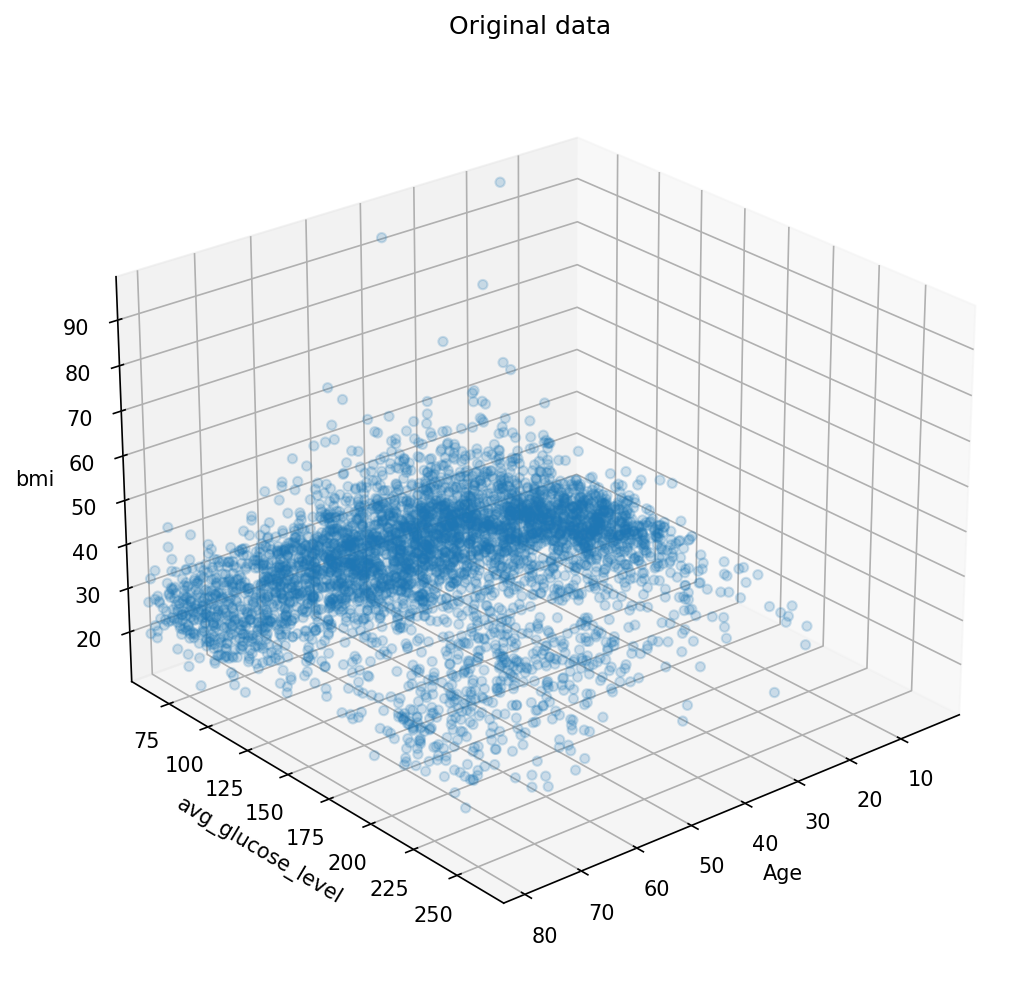

In [22]:
# Ploting the distribution of  original  data (age, glucose level and bmi)
fig = plt.figure()
fig = plt.figure(figsize=(8, 9), dpi=150)
ax = fig.add_subplot(projection='3d')
#plt.scatter(df.avg_glucose_level, df.bmi, c='#e377c2')
ax.view_init(elev=25., azim=50)
ax.set_xlim([np.min(X_train0[:,1]), np.max(X_train0[:,1])])
ax.set_ylim([np.min(X_train0[:,7]), np.max(X_train0[:,7])])
ax.set_zlim([np.min(X_train0[:,8]), np.max(X_train0[:,8])])              
ax.scatter(X_train0[:,1], X_train0[:,7], X_train0[:,8], alpha=0.2)
ax.set_xlabel('Age')
ax.set_ylabel('avg_glucose_level')
ax.set_zlabel('bmi')
plt.title('Original data')

Text(0.5, 0.92, 'Augmented data')

<Figure size 432x288 with 0 Axes>

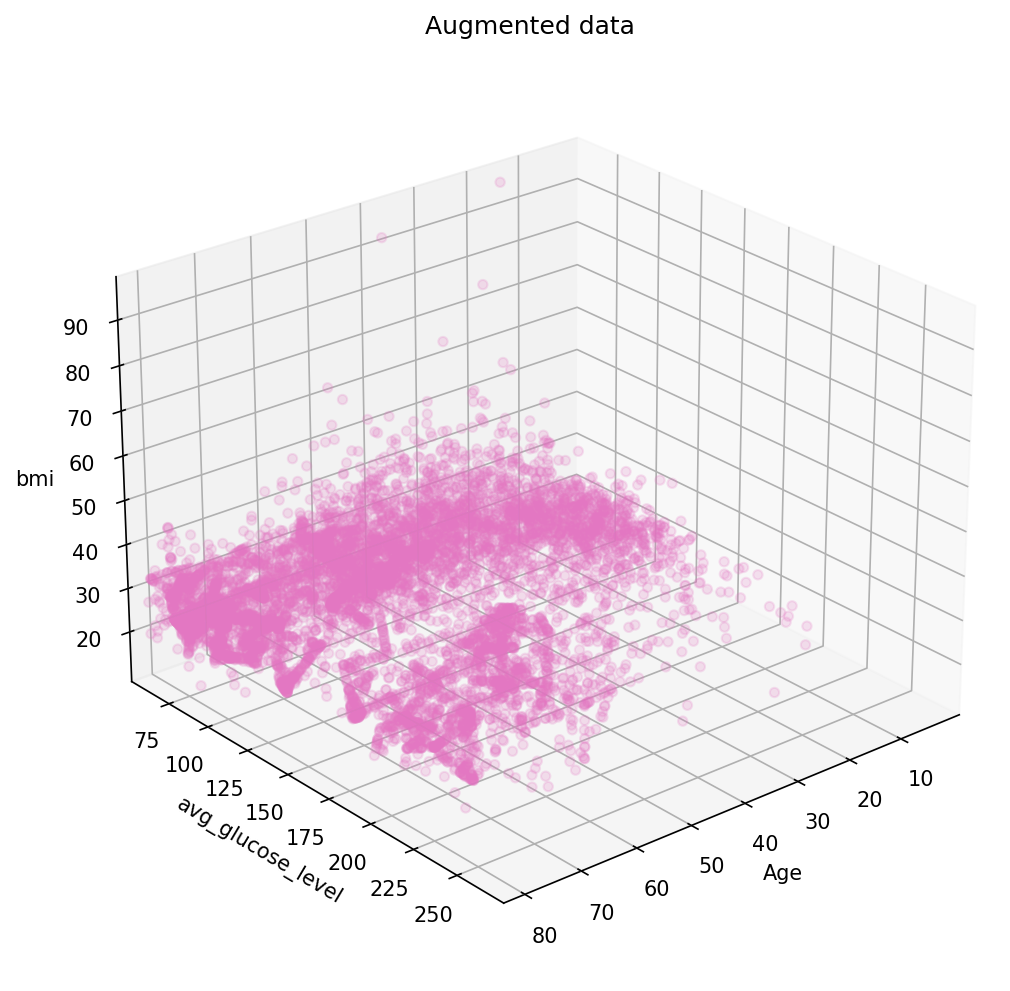

In [23]:
# Ploting the distribution of  upscaling data (age, glucose level and bmi)
fig2 = plt.figure()
fig2 = plt.figure(figsize=(8,9), dpi=150)
ax2 = fig2.add_subplot(projection='3d')
ax2.view_init(elev=25., azim=50)
ax2.set_xlim([np.min(X_train[:,1]), np.max(X_train[:,1])])
ax2.set_ylim([np.min(X_train[:,7]), np.max(X_train[:,7])])
ax2.set_zlim([np.min(X_train[:,8]), np.max(X_train[:,8])]) 
ax2.scatter(X_train[:,1], X_train[:,7], X_train[:,8], alpha=0.2, c='#e377c2')
ax2.set_xlabel('Age')
ax2.set_ylabel('avg_glucose_level')
ax2.set_zlabel('bmi')
plt.title('Augmented data')

# F1 score and  Confusion Matrix

In order to get a better insight of our predictions, we introduce the confusion matrix. Consider the next table which define the entries of the 4x4 matrix TN, FN, TP, TN,                 
          
            
            Actual      |  Predicted Negative   |   Predicted_Positive
            -------------------------------------------------------------------
       Actual Negatives |  True Negatives (TN)  |   False Positive (TN)      
       Actual Positive  |  False Negative (FN)  |   True Positive  (TP) 
           Predicted    |       0.                     1 

and the following ratios:
recall = TP / (TP+FN); precision = TP / (TP+FP); accuracy = (TP+TN) / (TP+FN+FP+TN); 
F1 score = 2 * (precision * recall) / (precision + recall). To link to our study, we display in the figure below the confusion matrix obtained for one ML model we have encoded (see next section)

The cases in which the patients have a stroke and our model also predicted not having it is called the True Negatives. For our matrix, True Negatives = 907. The cases in which the patients had a stroke and our model also predicted as having it is called the True Positives. For our matrix, True Positives = 11. Cases where the patient had no stroke, but our model has predicted that they do, are False Positives. For our matrix, False Positives = 53. And finally, there are some cases where the person had a stroke, but our model predicted he don’t, they are False Negatives and we have 51 in our table.  So, recall is the measure of our model correctly identifying strokes, while precision is the measure of cases that we correctly identify having a stroke out of all the cases having it.  F1 shows the trade-off of both scores. Accuracy is indeed misleading because it can be very high while having a low recall or precision. For a given calculated ML model the score are: recall = 17.74%, precision = 17.18%, accuracy = 89.82%.

Therefore, although we target for our studies a high recall, we should keep an eye on a not so low precision score. Both conditions should be reflected in a moderated F1 score. 

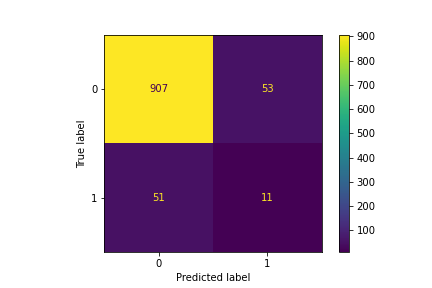

In [24]:
Image('DecisionTreeClassifier0.png')

 # All-around models calculations to predict the stroke
 
After upscaling our data and defining the scores we will use in our models, we proceed to evaluate the five chosen machine learning models. Since we have labeled data as stroke and no-stroke, we use supervised ML and classifiers in all models.

We will take care also of the data scaling by testing the MinMaxScaler, StandardScaler, and  RobustScaler scalers. Both, the ML model and the scaling are wrapped in Pipeline which scales the data and applies one ML model. To facilitate the burden of running the five models and three scalers, we deploy a loop over the ML models. However, at this point all settings in the models are default.
 
-DecisionTreeClassifier {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best', 'min_samples_leaf': 1}
-LogisticRegresion {'C': 1, 'penalty': 'True', 'fit_intercept': 42, 'solver': 'lbfgs'}
-RandomForestClassifier {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 100, 'criterion': 'gini'}
-KNeighborsClassifier {'C': 1, 'penalty': 'True', 'fit_intercept': 42, 'solver': 'lbfgs'}
-SupportVectorClassifier  {'C': 1, 'kernel': 'rbf', 'gamma': scale, 'decision_function_shape':ovr} (one vs rest)

The loop also create the confusion matrix.

After the evaluation of each model, its five score are saved as data frames. 

DecisionTreeClassifier


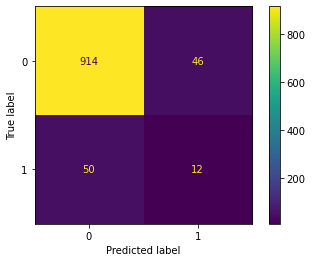

Classification Report : -
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.21      0.19      0.20        62

    accuracy                           0.91      1022
   macro avg       0.58      0.57      0.58      1022
weighted avg       0.90      0.91      0.90      1022

LogisticRegression    


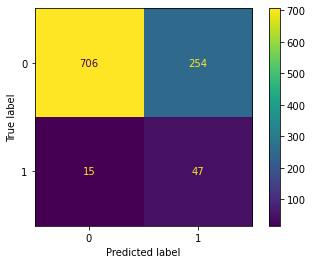

Classification Report : -
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.76      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.74      0.80      1022

RandomForestClassifier


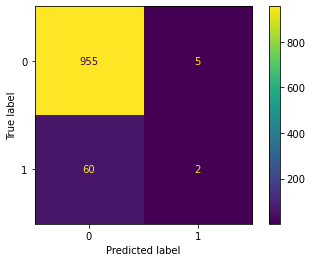

Classification Report : -
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.29      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.61      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022

KNeighborsClassifier  


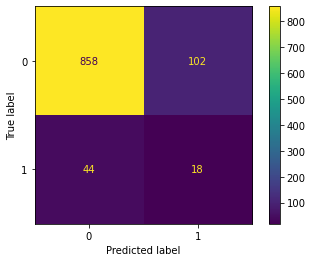

Classification Report : -
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.15      0.29      0.20        62

    accuracy                           0.86      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.90      0.86      0.88      1022

SVC                   


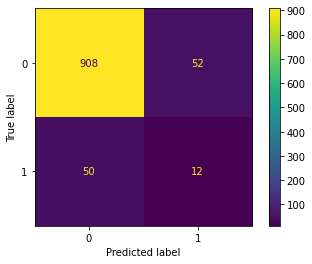

Classification Report : -
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.19      0.19      0.19        62

    accuracy                           0.90      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.90      0.90      0.90      1022



In [25]:
list_smodels = ['DecisionTreeClassifier', 'LogisticRegression    ', 'RandomForestClassifier', 'KNeighborsClassifier  ',
                'SVC                   ']
list_models = [DecisionTreeClassifier, LogisticRegression,  RandomForestClassifier,  KNeighborsClassifier, SVC]
list_scores = ["Av. F1_train", "Accuracy", "Recall", "Precision", "F1_test"] # ,"ROC AUC Score"
pd_list = []
sc = MinMaxScaler
#sc = StandardScaler
#sc = RobustScaler #(quantile_range=(25, 75)).fit_transform(X)

for (m, ms) in zip(list_models, list_smodels):
    
    if m != KNeighborsClassifier:
        model = m(random_state=42)
    else: model = m()
    pipe = Pipeline(steps = [('scale', sc()),('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pd_list.append(pd.DataFrame(data=[
                               cross_val_score(pipe,X_train ,y_train ,cv=6, scoring='f1', n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred),
                               recall_score(y_test, y_pred),
                               precision_score(y_test, y_pred),
                               f1_score(y_test,y_pred)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))
    print(ms)
    cm =confusion_matrix(y_test, y_pred, normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    namemat = ms + '.png'
    plt.savefig(namemat)
    plt.show()
    print(f"Classification Report : -\n {classification_report(y_test, y_pred)}")  
#     cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
#     print(cross.to_markdown())

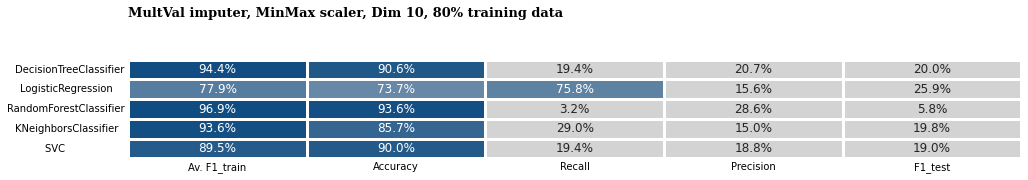

In [26]:
df_models = round(pd.concat(pd_list, axis=1),3)

colors = ["lightgray","lightgray","#0f4c81"]
colormap = clrs.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(16, 10)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax0.text(0,-2.15,'MultVal imputer, MinMax scaler, Dim 10, 80% training data',fontsize=13,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig('scores_08train_multval_minmaxsc.png')

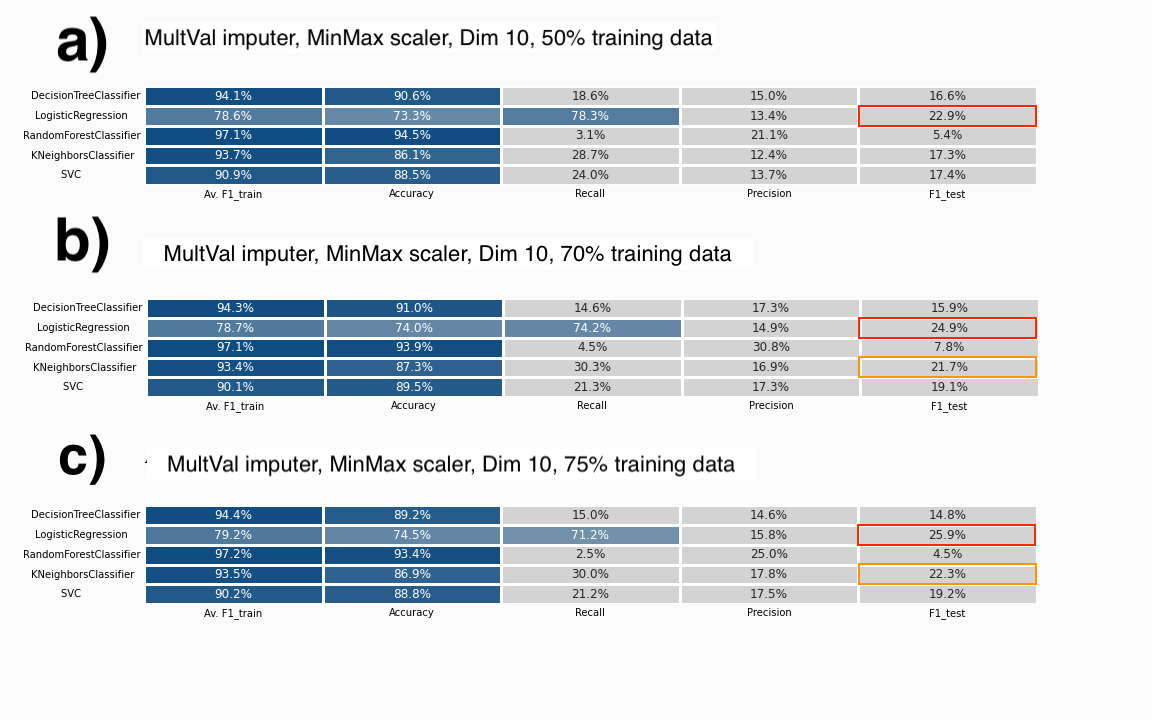

In [27]:
Image("scores_050train_multval.png")

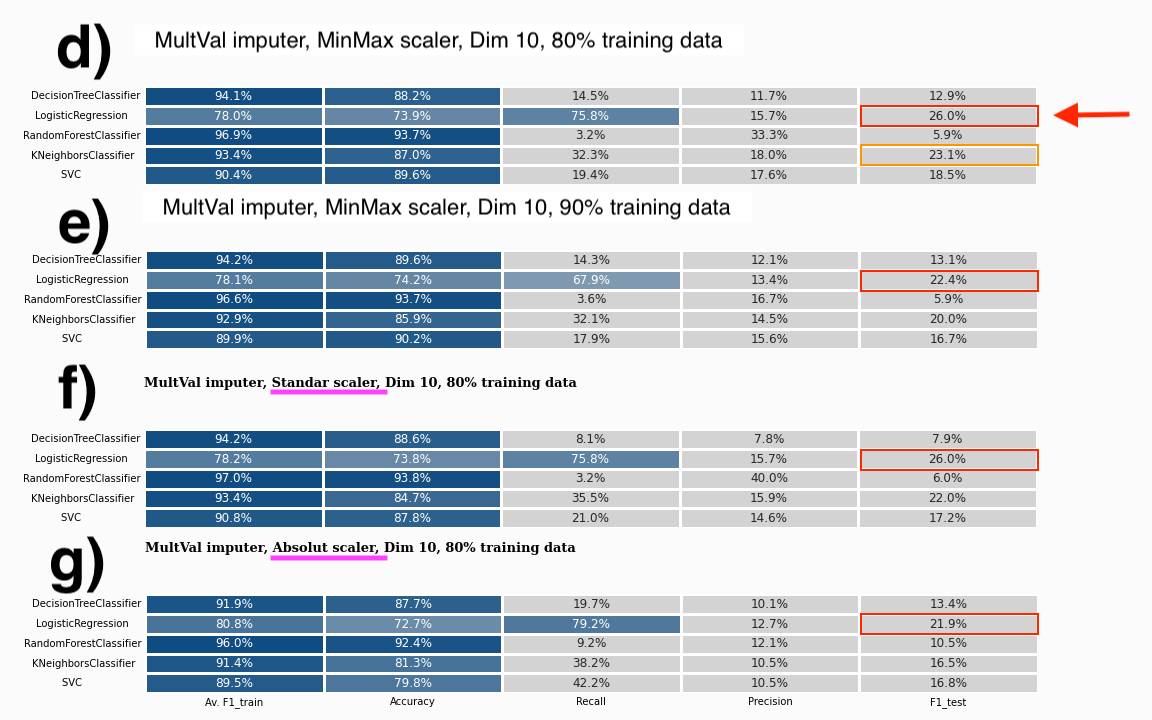

In [28]:
Image("scores_08train_multval.png")

In [29]:
# # # Use next block, which is independent from the previous all around loop
# X2 = MinMaxScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X2, y, train_size=0.3, random_state=42)
# sm_sample = SMOTE()
# X_train, y_train = sm_sample.fit_resample(X_train, y_train)
pd_list_gs = [] # List to save grid search results

# Discussion of first results
The results of our first modeling are listed in tables a) to e). The last column corresponds to the mean of the F1 score calculated in cross-validation in six batches of trained data, because the mean is trained data the score is high. The next five columns display the values of the four scores we have in the test data. Here we observe, that consistently the logistic regression scores the highest recall and F1 scores across all % of data training. In contrast, Random Forest Classifier performs very poorly in all-important scores. K Neighbors Classifier shows an improvement as the % of data used for training is increased. Interestingly, Support Vector Classifier maintains relatively the same scores. At 50% of trained data, the Recall score has its maximum; as the % increases, we observe that the Precision score for the Logistic Regression model increased, at the expense of a decrease in the Recall. We believe the table d) with 80% of data training (see red arrow) presents the best results: it contains a 75.8 %Recall and 15.7% Precision. This best possible result we could achieve in this first attempt is reflected in the highest F1 score in our set of models. We did not observe any modification in the Logistic regression when we use the Standard scaler, the other ML model however did show some modifications. The Robust scaler reduces all F1 scores, in the case of Logistic regression the Recall increase to 79.2%. I think logistic regression has performed slightly better because it can handle continuous variables as well as categorical values. 

# Grid Search (Exhaustive search over parameters)
As a next logical step to improve the scores, given the same dataset, we proceed in this section to improve the F1 score by searching for each ML model some key parameters. The parameter space we are interested in are parameters external to the models, that is, parameters that the model does not change during its optimization, and they are fixed from the begging. The so-called hyperparameters. The GridSearchCV class from Sklearn will allow us to vary hyperparameters we consider relevant and will provide us with the best combination of parameters based on our F1 score. Since this can be a very time-consuming process we limit the search to a combination of a few hyperparameters and narrow ranges within their limits. The GridSearchCV class of set to its default model. For score optimization, we use the F1 score. 

## Grid Search. Decision Tree Classifier

In [30]:
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy'] #  problem to use , 'log_loss'
random_state = [42]
dtc_param_grid = {'max_features': max_features, 'criterion' : criterion, 
                  'random_state': random_state}
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, dtc_param_grid, scoring='f1', cv=6)
dtc_pipe_gs = Pipeline(steps=[('scale', sc()), ('GS', grid)])
dtc_pipe_gs.fit(X_train, y_train)
print('best tuned par:', grid.best_params_)

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explici

best tuned par: {'criterion': 'entropy', 'max_features': 'auto', 'random_state': 42}


/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explici

In [31]:
# best tuned par: {'criterion': 'gini', 'max_features': 'log2', 'random_state': 42}
# best tuned par: {'criterion': 'entropy', 'max_features': 'auto', 'random_state': 42}

dtc_pipe = Pipeline(steps = [('scale', sc()),
                            ('DTC', DecisionTreeClassifier(criterion='entropy', 
                                    max_features= 'auto', random_state=42))])

dtc_pipe.fit(X_train, y_train)
y_pred_gs   = dtc_pipe.predict(X_test)
ms = "DecisionTreeClassifier"
pd_list_gs.append(pd.DataFrame(data=[
                               cross_val_score(dtc_pipe,X_train ,y_train ,cv=6, n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred_gs),
                               recall_score(y_test, y_pred_gs),
                               precision_score(y_test, y_pred_gs),
                               f1_score(y_test,y_pred_gs)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))

confusion_matrix(y_test, y_pred)
cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross.to_markdown())

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 908 |  52 |   960 |
| 1        |  50 |  12 |    62 |
| All      | 958 |  64 |  1022 |


/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explici

## Grid Search. Logistic Regression

In [32]:
# penalty = ['l2']
# C = [0.001, 0.01, 0.1, 1, 10, 100]
# random_state = [42]
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # default=’lbfgs
# param_grid = {'penalty': penalty, 'C':C, 'random_state': random_state, 'solver': solver}

# logreg = LogisticRegression()
# grid = GridSearchCV(logreg, param_grid, scoring='f1', cv=6)
# logreg_pipe_gs = Pipeline(steps=[('scale', sc()), ('GS', grid)])
# logreg_pipe_gs.fit(X_train, y_train)
# print('best tuned par:', grid.best_params_)

In [33]:
# best tuned par: {'C': 1, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
# best tuned par: {'C': 0.01, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'      
    
logreg_pipe = Pipeline(steps = [('scale',sc()), ('LR',LogisticRegression(penalty='l2',
                                                C=1, random_state=42, solver='newton-cg', n_jobs=2))])
logreg_pipe.fit(X_train, y_train)
y_pred_gs = logreg_pipe.predict(X_test)
ms = "LogisticRegression"
pd_list_gs.append(pd.DataFrame(data=[
                               cross_val_score(logreg_pipe,X_train ,y_train ,cv=6, n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred_gs),
                               recall_score(y_test, y_pred_gs),
                               precision_score(y_test, y_pred_gs),
                               f1_score(y_test,y_pred_gs)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))

confusion_matrix(y_test, y_pred)
cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross.to_markdown())

| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 908 |  52 |   960 |
| 1        |  50 |  12 |    62 |
| All      | 958 |  64 |  1022 |


## Grid Search. Random Forest Classifier

In [34]:
# n_estimators =[64, 100, 128, 200]
# max_features = [2, 3, 5, 7]
# bootstrap = [True, False]
# random_state = [42]
# param_grid = {'n_estimators': n_estimators, 'max_features': max_features,
#               'bootstrap': bootstrap, 'random_state': random_state}
# rfc = RandomForestClassifier()
# grid = GridSearchCV(rfc, param_grid)
# grid.fit(X_train,y_train)
# print('best tuned par:', grid.best_params_)

In [35]:
# best tuned par: {'bootstrap': False, 'max_features': 2, 'n_estimators': 64, 'random_state': 42}

rfc_pipe = Pipeline(steps = [('scale', sc()), ('RFC',RandomForestClassifier(max_features=2,
                             n_estimators=64, bootstrap=False, random_state=42, n_jobs=2))])

rfc_pipe.fit(X_train, y_train)
y_pred_gs = rfc_pipe.predict(X_test)
ms = "RandomForestClassifier"
pd_list_gs.append(pd.DataFrame(data=[
                               cross_val_score(logreg_pipe,X_train ,y_train ,cv=6, n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred_gs),
                               recall_score(y_test, y_pred_gs),
                               precision_score(y_test, y_pred_gs),
                               f1_score(y_test,y_pred_gs)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))

confusion_matrix(y_test, y_pred)
cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross.to_markdown())

| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 908 |  52 |   960 |
| 1        |  50 |  12 |    62 |
| All      | 958 |  64 |  1022 |


## Grid search. K Neighbors Classifier (with pipeline)

## Grid search.  support vector machine

In [36]:
# param_grid = {'kernel':('linear', 'rbf'), 'C': [1, 10, 100, 1000], 'random_state': [42]}
# svc = SVC()

# grid = GridSearchCV(svc, param_grid, scoring='f1', cv=6)
# svc_pipe_gs = Pipeline(steps=[('scale', sc()), ('GS', grid)])
# svc_pipe_gs.fit(X_train, y_train)
# print('best tuned par:', grid.best_params_)

In [37]:
# best tuned par: {'C': 10, 'kernel': 'rbf', 'random_state': 4}
# best tuned par: {'C': 1000, 'kernel': 'rbf', 'random_state': 42}
    
svc_pipe = Pipeline(steps = [ ('SVC', SVC(C=1000, kernel='rbf',
                                                                    random_state=42))])
svc_pipe.fit(X_train,y_train)
y_pred_gs = svc_pipe.predict(X_test)
y_pred_gs = logreg_pipe.predict(X_test)
ms = "SVC"
pd_list_gs.append(pd.DataFrame(data=[
                               cross_val_score(svc_pipe,X_train ,y_train ,cv=6, n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred_gs),
                               recall_score(y_test, y_pred_gs),
                               precision_score(y_test, y_pred_gs),
                               f1_score(y_test,y_pred_gs)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))
confusion_matrix(y_test, y_pred)
cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross.to_markdown())

| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 908 |  52 |   960 |
| 1        |  50 |  12 |    62 |
| All      | 958 |  64 |  1022 |


## Results for Grid Search

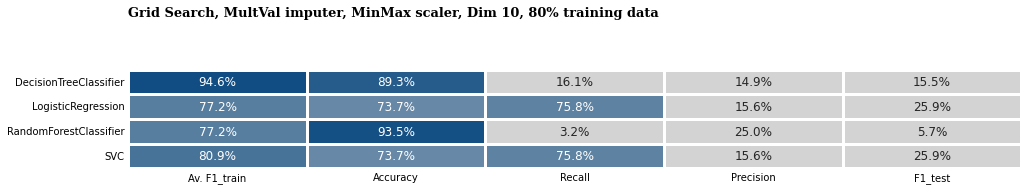

In [38]:
df_models = round(pd.concat(pd_list_gs, axis=1),3)

colors = ["lightgray","lightgray","#0f4c81"]
colormap = clrs.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(16, 10)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax0.text(0,-2.15,'Grid Search, MultVal imputer, MinMax scaler, Dim 10, 80% training data',fontsize=13,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig('gs_scores_08train_multval_minmaxsc.png')

In the table, we see that only the Random Forest Classifier remains with a low F1 score, while the Decision tree remains close to the previous calculation and the others achieved F1 scores above 26 %. The maximum score is now not only for the Logistic Regression but also for the support vector classifier. Here we should further use as an optimized score the recall, which is a more important score for improvement.

# Precision Recall Curve
The next precision recall curve ilustrate how dificult is to achieve simultenessly  high precision and high recall.

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVC model Precision-Recall curve: AP=0.14')

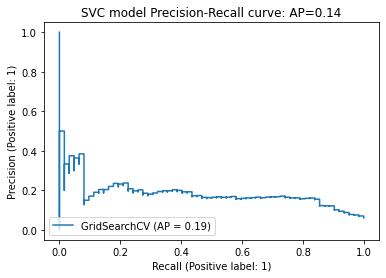

In [39]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

sv=SVC(C=1,kernel='rbf')
parameters = { 'C' : [800 , 1000 ] }
# parameters = { 'C' : [0.1 , 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 100, 250 ,800 , 1000 ] }
grid_SVC = GridSearchCV( sv, parameters )  
mod_SVC = grid_SVC.fit( X_train, y_train )
# print('best tuned par:', grid_SVC.best_params_)
# best tuned par: {'C': 1000}
SVCsc_train=mod_SVC.score(X_train,y_train)
SVCsc_test=mod_SVC.score(X_test,y_test)
y_pred_SVC=mod_SVC.predict(X_test)

plot_precision_recall_curve(mod_SVC, X_test, y_test).ax_.set_title(
    'SVC model Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision_score(y_test,y_pred_SVC)))

# Importance features with reduced dimensionality

In this section, we employ a feature importance analysis. Here the idea is to identify dominating features that could play an important role in rightly identifying strokes. This will be seen in our plots by the height of each feature. Then based on the heights of the features we discriminate which feature may not be relevant and ignore them for the next round of machine learning prediction.

Here we use the method implemented in attribute the "feature_importances_" of "scikit-learn". The method starts by generating data sets with three features. We will apply this attribute to a Radom forest and a decision tree ML model to follow the purity of the features as the tree grows. The purity of the feature is plotted in the next plot bars.

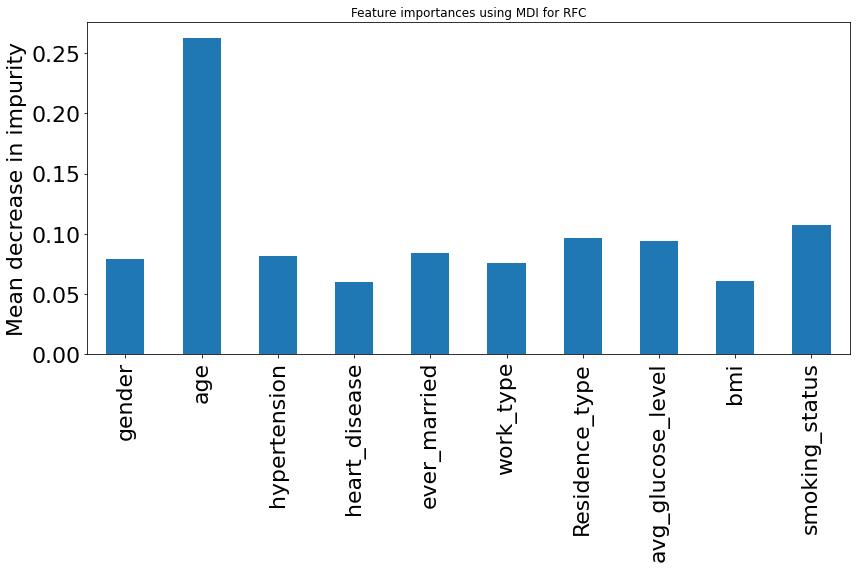

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


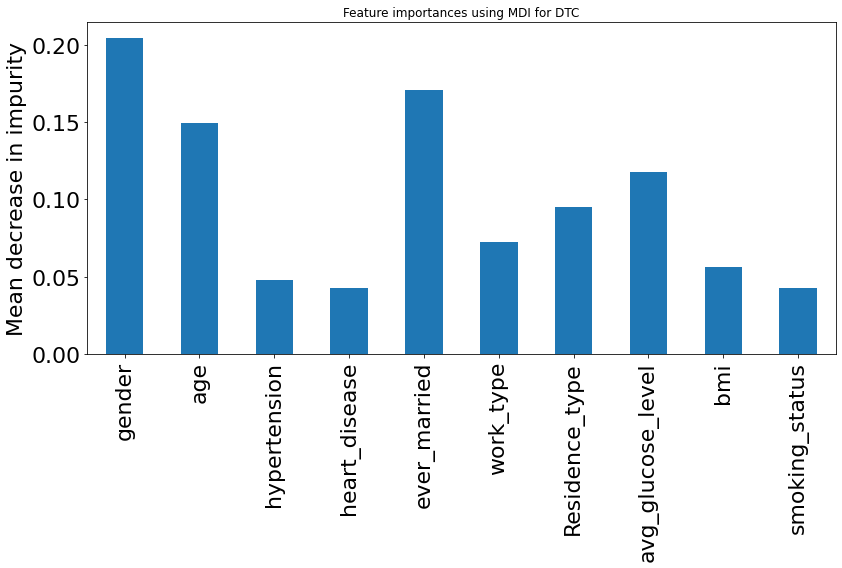

In [40]:
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
list_pipes = [rfc_pipe, dtc_pipe]
list_models = ['RFC', 'DTC']


for (m, p) in zip(list_models, list_pipes):
    model_cl = p[m]
    model_cl.fit(X_train, y_train)
    importances = model_cl.feature_importances_
#    print(len(importances))
#    std = np.std([tree.feature_importances_ for tree in model_cl.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots(figsize=(12,8))
    forest_importances.plot.bar(ax=ax)  # , yerr=std
    title = "Feature importances using MDI for "+ m
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity", fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    fig.tight_layout()
    svp = 'importfeat' + m + '.png'
#     plt.savefig(svp)
    plt.show()

## Reduce dimensionality

In [41]:
# Start working with original data frame (df)
df_reddim = df.drop([ 'Residence_type', 'heart_disease', 'stroke'], axis = 1)
#df_reddim = df_modeled.drop([ 'Residence_type', 'heart_disease', 'stroke'], axis = 1)

y = df.drop(['id'], axis = 1)
y = y.stroke.values

X_inp = MultiColumnLabelEncoder(columns=['gender', 'ever_married',
                                          'work_type','smoking_status']).fit_transform(df_reddim)
X= decision_tree_imputer(X_inp)
X = MinMaxScaler().fit_transform(X) #print(np.shape(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=trainperc, random_state=42)
X_train, y_train = sm_sample.fit_resample(X_train, y_train)     # sm_sample = SMOTE()
X_inp.head()

Decision Tree Imputer used
After decision three imputer 
    gender   age  hypertension  ever_married  work_type  avg_glucose_level  \
0        1  67.0             0             1          2             228.69   
1        0  61.0             0             1          3             202.21   
2        1  80.0             0             1          2             105.92   
3        0  49.0             0             1          2             171.23   
4        0  79.0             1             1          3             174.12   
5        1  81.0             0             1          2             186.21   
6        1  74.0             1             1          2              70.09   
7        0  69.0             0             0          2              94.39   
8        0  59.0             0             1          2              76.15   
9        0  78.0             0             1          2              58.57   
10       0  81.0             1             1          2              80.43   
11     

id  gender   age  hypertension  ever_married  work_type  \
0   9046       1  67.0             0             1          2   
1  51676       0  61.0             0             1          3   
2  31112       1  80.0             0             1          2   
3  60182       0  49.0             0             1          2   
4   1665       0  79.0             1             1          3   

   avg_glucose_level        bmi  smoking_status  
0             228.69  36.600000               1  
1             202.21  29.879487               2  
2             105.92  32.500000               2  
3             171.23  34.400000               3  
4             174.12  24.000000               2

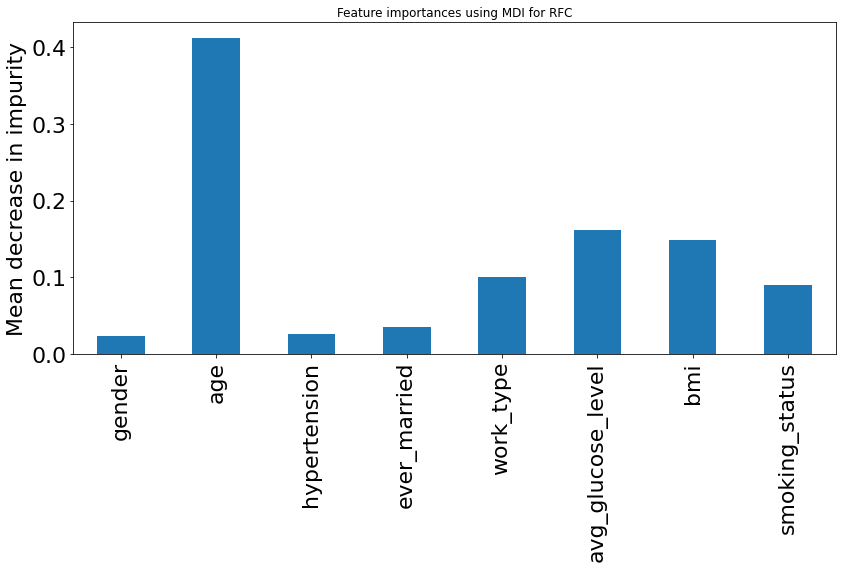

/Users/joaquin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


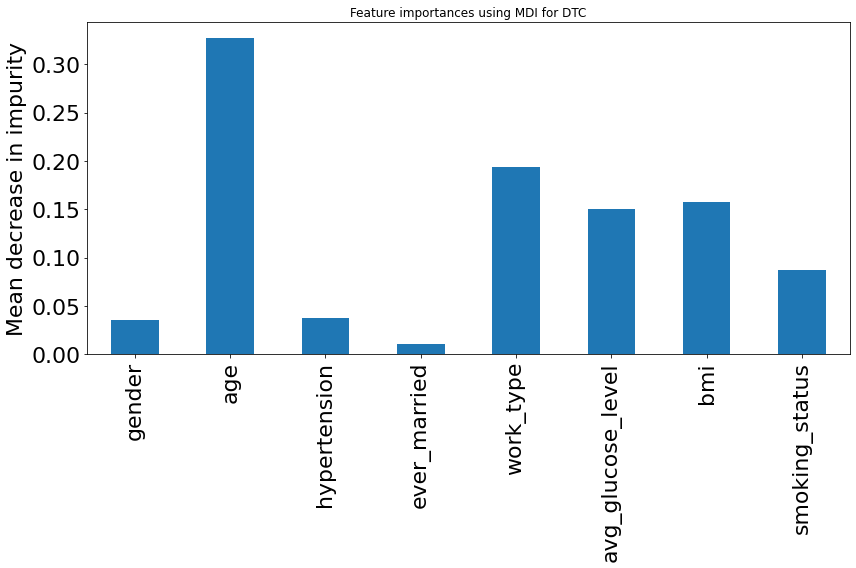

In [42]:
feature_names = ['gender', 'age', 'hypertension', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']
list_pipes = [rfc_pipe, dtc_pipe]
list_models = ['RFC', 'DTC']


for (m, p) in zip(list_models, list_pipes):
    model_cl = p[m]
    model_cl.fit(X_train, y_train)
    importances = model_cl.feature_importances_
#    std = np.std([tree.feature_importances_ for tree in model_cl.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots(figsize=(12,8))
    forest_importances.plot.bar(ax=ax)  # , yerr=std
    title = "Feature importances using MDI for "+ m
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity", fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    fig.tight_layout()
    svp = 'importfeat_reddim' + m + '.png'
    plt.savefig(svp)
    plt.show()

## Recalculate models with Reduced dimension
Finally, we apply our five machine learning models to the reduced dimension data. The results are shown in the following table.

In [43]:
list_smodels = ['DecisionTreeClassifier', 'LogisticRegression    ', 'RandomForestClassifier',
                'KNeighborsClassifier', 'SVC                   ']
list_models = [DecisionTreeClassifier, LogisticRegression,  RandomForestClassifier,  
               KNeighborsClassifier, SVC, MLPClassifier]

list_scores = ["Av. F1_train", "Accuracy", "Recall", "Precision", "F1_test"] # ,"ROC AUC Score"
pd_list_reddim = []
sc = MinMaxScaler
#sc = StandardScaler
#sc = RobustScaler #(quantile_range=(25, 75)).fit_transform(X)

for (m, ms) in zip(list_models, list_smodels):
    
    if m != KNeighborsClassifier:
        model = m(random_state=42)
    else: model = m()
    pipe = Pipeline(steps = [('scale', sc()),('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    pd_list_reddim.append(pd.DataFrame(data=[
                               cross_val_score(pipe,X_train ,y_train ,cv=6, scoring='f1', n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred),
                               recall_score(y_test, y_pred),
                               precision_score(y_test, y_pred),
                               f1_score(y_test,y_pred)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))
    
    print(ms)
#     cm =confusion_matrix(y_test, y_pred, normalize=None)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.show()   
    confusion_matrix(y_test, y_pred)
    cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(cross.to_markdown())

DecisionTreeClassifier
| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 848 | 112 |   960 |
| 1        |  48 |  14 |    62 |
| All      | 896 | 126 |  1022 |
LogisticRegression    
| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 712 | 248 |   960 |
| 1        |  17 |  45 |    62 |
| All      | 729 | 293 |  1022 |
RandomForestClassifier
| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 903 |  57 |   960 |
| 1        |  47 |  15 |    62 |
| All      | 950 |  72 |  1022 |
KNeighborsClassifier
| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 800 | 160 |   960 |
| 1        |  37 |  25 |    62 |
| All      | 837 | 185 |  1022 |
SVC                   
| Actual   |   0 |   1 |   All |
|:---------|----:|----:|------:|
| 0        | 716 | 244 |   960 |
| 1        |  17 |  45 |    62 |
| All      | 733 | 289 |  1022 |


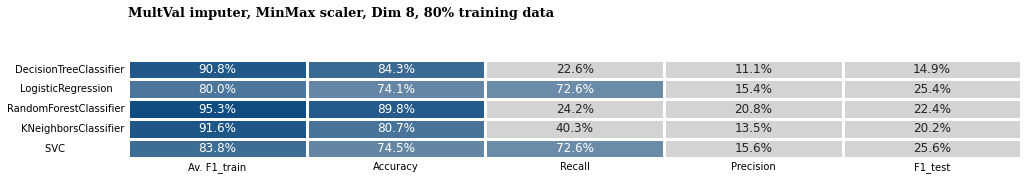

In [44]:
df_models = round(pd.concat(pd_list_reddim, axis=1),3)

colors = ["lightgray","lightgray","#0f4c81"]
colormap = clrs.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(16, 10)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax0.text(0,-2.15,'MultVal imputer, MinMax scaler, Dim 8, 80% training data',fontsize=13,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig('scores_08train_multval_minmaxsc_reddim.png')

# Comparation Initial models, Grid search and Reduced dimensions.
The previous table shows that reducing to eight features we could reach higher F1_scores for all classifiers, while the logistic regression remain almost without modification.

In [45]:
#Image("scores_08train_multval_vs_gs_vs_reddim.png")

# Naive Bayes,  Multinomial Bayes
With the multinomial naive Bayes we reach a 20% F1 score, with a quite important improvment of 56% for the recall score.

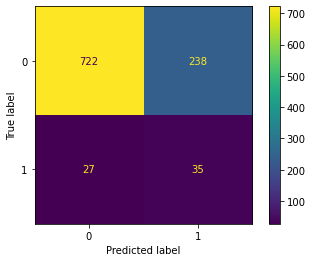

In [46]:
pd_NB = []
# sc = MinMaxScaler
mnnb_pipe = Pipeline(steps = [('scale', sc()), ('MNNB', MultinomialNB())])
mnnb_pipe.fit(X_train,y_train)
y_pred = mnnb_pipe.predict(X_test)
y_pred = mnnb_pipe.predict(X_test)
ms = "MultNomialNaiveB"
pd_NB.append(pd.DataFrame(data=[
                               cross_val_score(mnnb_pipe,X_train ,y_train ,cv=6, n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred),
                               recall_score(y_test, y_pred),
                               precision_score(y_test, y_pred),
                               f1_score(y_test,y_pred)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))
cm =confusion_matrix(y_test, y_pred, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# confusion_matrix(y_test, y_pred)
# cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
# print(cross.to_markdown())

In [47]:
print(pd_NB) # 

[              MultNomialNaiveB
Av. F1_train          0.631410
Accuracy              0.740705
Recall                0.564516
Precision             0.128205
F1_test               0.208955]


# Machine Learning Perceptron Classifier.
Finally, we deploy a neural network. The class MLPClassifier uses perceptrons. With this model we could improve the recall,  achieving a socre of almost 60%, while keeping the F1 score at 22 %. 

In [48]:
# # param_grid = {'activation':('identity', 'logistic', 'relu'), 'learning_rate_init': [0.001, 0.0001, 0.00005],
# #               'hidden_layer_sizes' : ['(16,)'], 
# #               'max_iter' : [300, 1000, 2000], 'random_state': [42]}

# param_grid =    {
#      'solver': ['adam'],
#      'learning_rate_init': [0.001, 0.0001, 0.00005],
#      'max_iter': [1000, 2000],
#      'hidden_layer_sizes': [(16,8)],
#      'activation': ['identity', 'logistic', 'tanh', 'relu'],
#      'alpha': [0.0001, 0.001, 0.005],
#      'early_stopping': [True, False]
#      }
# nnc = MLPClassifier()

# grid = GridSearchCV(nnc, param_grid, scoring='f1', cv=6)
# nnc_pipe_gs = Pipeline(steps=[('scale', sc()), ('GS', grid)])
# nnc_pipe_gs.fit(X_train, y_train)
# print('best tuned par:', grid.best_params_)

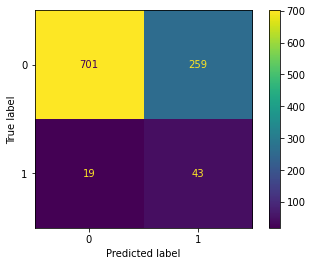

In [49]:
# best tuned par: {'activation': 'relu', 'alpha': 0.005, 'early_stopping': False,
#'hidden_layer_sizes': (16, 8), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}

pd_mlpc = []

mlpc_pipe = Pipeline(steps = [ ('MLPC', MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu',                                              
                                            learning_rate_init= 0.001, solver= 'adam',
                                            max_iter=1000,  random_state=42))])
mlpc_pipe.fit(X_train,y_train)
y_pred = mlpc_pipe.predict(X_test)
y_pred = mlpc_pipe.predict(X_test)
ms = "MLPC"
pd_mlpc.append(pd.DataFrame(data=[
                               cross_val_score(svc_pipe,X_train ,y_train ,cv=6, n_jobs=2).mean(),
                               accuracy_score(y_test, y_pred),
                               recall_score(y_test, y_pred),
                               precision_score(y_test, y_pred),
                               f1_score(y_test,y_pred)], 
                               #,roc_auc_score(y_test, y_pred)], 
                       columns=[ms],
                       index=list_scores))

cm =confusion_matrix(y_test, y_pred, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# confusion_matrix(y_test, y_pred)
# cross = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
# print(cross.to_markdown())

In [50]:
pd_mlpc

[                  MLPC
 Av. F1_train  0.899615
 Accuracy      0.727984
 Recall        0.693548
 Precision     0.142384
 F1_test       0.236264]

# Neural Networs with TensorFlow
As last strategy to achive higher recall score, we design with the help of TensorFlow a neural network. Here the strategy we follow was to set an early stop for the epochs while we were monitoring the the recall score in a double inner neural network with 100 and 50 neurons, respectevely.

In [51]:
from tensorflow import keras
import tensorflow_addons as tfa

2022-06-18 21:06:10.698826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])


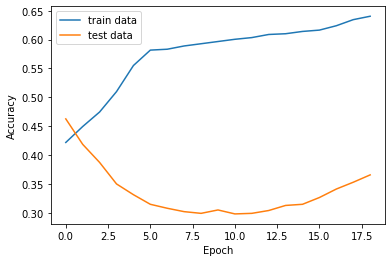

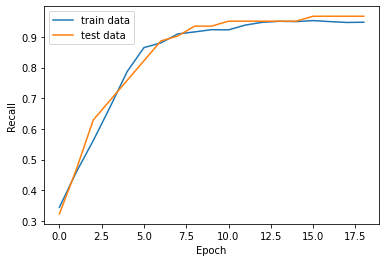

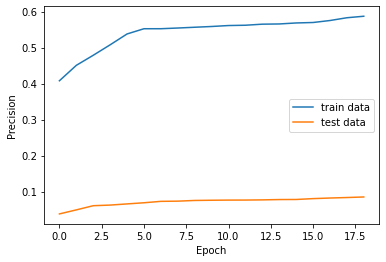

Accuracy of test data: 0.3659491193737769
Accuracy of train data: 0.6444871794871795
Recall of test data: 0.967741935483871
Precision of test data: 0.08498583569405099
Recall of train data: 0.9497435897435897
Precision of train data: 0.5897150135328769
32/32 [==============================] - 0s 796us/step


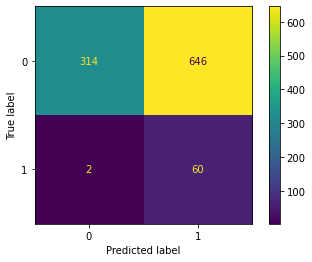

In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
# Output layer for binary classification
model.add(keras.layers.Dense(1, activation='sigmoid'))

rec = keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name='recall', dtype=None)
pre = keras.metrics.Precision(thresholds=None, top_k=None, class_id=None, name='precision', dtype=None)
f_1 = tfa.metrics.F1Score(num_classes=2)

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', rec, pre])

# Use callback to stop the trainning after recall does not improve after 10 epochs
callback = keras.callbacks.EarlyStopping(monitor='recall',patience=18, mode="auto")

history = model.fit(X_train, y_train, batch_size=500,
                    epochs=500, verbose=False,
                    validation_data=(X_test, y_test),
                    callbacks=[callback]
                    )

len(history.history['recall'])

print(history.history.keys())

plt.plot(figsize=(12,9))
plt.plot(history.history['accuracy'], label='train data')
plt.plot(history.history['val_accuracy'], label='test data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['recall'], label='train data')
plt.plot(history.history['val_recall'], label='test data')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

plt.plot(history.history['precision'], label='train data')
plt.plot(history.history['val_precision'], label='test data')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

y_pred_test = model.predict(X_test, verbose=False)
print('Accuracy of test data:', accuracy_score(y_test, np.round(y_pred_test)))

y_pred_train = model.predict(X_train, verbose=False)
print('Accuracy of train data:', accuracy_score(
    y_train, np.round(y_pred_train)))

y_pred_test = model.predict(X_test, verbose=False)
print('Recall of test data:', recall_score(y_test, np.round(y_pred_test)))
print('Precision of test data:', precision_score(y_test, np.round(y_pred_test)))

y_pred_train = model.predict(X_train, verbose=False)
print('Recall of train data:', recall_score(y_train, np.round(y_pred_train)))
print('Precision of train data:', precision_score(y_train, np.round(y_pred_train)))
    
y_pred = np.round(model.predict(X_test))
cm =confusion_matrix(y_test, y_pred, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Conclusions
The first plot shows that the accuracy of the test data very fast decreases. The improvement of our target score, namely the recall, is seen in the second plot achieving very high values above 95%; importantly, the training process is stopped after the Callback function did not notice any improvement in the recall store. The high recall store is clearly  observed in the confusion matrix, where only very few cases of strokes were not detected. However, this very high score comes at the expense of precision. The precision never increases to more than 10%. So, we can say that we successfully obtained with the two-layer neural network a reliable recall score that can provide high confidence to medical practitioners.  

Many thanks to Frau Elisabeth Staegemann for reviewing the project and code.